In [1]:
import pandas as pd
import numpy as np
import json
import datetime as datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data/concatenated.csv')

In [4]:
def get_json(path):
    """
    Helper function to get parsed json data

    :param path: the path where all channel folders are. Define in main
    :return: parsed json data
    """
    with open(path) as f:
        json_string = f.read()
        parsed_json = json.loads(json_string)
        return parsed_json

In [7]:
channels_json = get_json('data/slack_data/channels.json')

In [8]:
users_json = get_json('data/slack_data/users.json')

In [9]:
channels = [channel['name'] for channel in channels_json]

In [10]:
users = [user['id'] for user in users_json]

In [11]:
# list of all members in all channels, indexed by number (ordered alphabetically)
channels_members = [channel['members'] for channel in channels_json]

In [12]:
users_dict = dict()
for user in users_json:
    users_dict[user['id']] = user['name']

In [13]:
# all users in a channel
def get_users_in_channel(channel_name):
    channels_json = get_json('channels.json')
    for channel in channels_json:
        if channel['name'] == channel_name:
            return channel['members']

In [45]:
# get number of post counts by a user in a channel
def get_users_post_count(data, user_id, channel):
    count = len(data[(data['channel'] == channel) & (data['id'] == user_id)])
    return count

In [46]:
get_users_post_count(data, 'U1P8QBBD1', 'general')

13

In [18]:
# count of reactions in a channel to measure engagement
def get_user_reaction_count_in_channel(path, channel, user_id):#, channel):
    path_ = os.path.join(path, str(channel))
    folder = os.listdir(path_)
    count = 0
    
    for f in folder:
        json_path = os.path.join(path_, f)
        json = get_json(json_path)
        
        for j in json:
            #skip lines with no 'text' or 'user'
            if 'subtype' in j:
                continue
            
            if 'reactions' in j:
                for reaction in j['reactions']:
                    if user_id in reaction['users']:
                        count+=1
                    
    return count   
        
get_user_reaction_count_in_channel("data/slack_data", "general", "U1P8QBBD1")

213

In [25]:
user_channel_reactions = []

for channel in channels:
    channel_array = []
    for user in users:
        channel_array.append(get_user_reaction_count_in_channel("data/slack_data", channel, user))

    user_channel_reactions.append(channel_array)
user_channel_reactions

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  16,
  0,
  0,
  0,
  6,
  0,
  19,
  6,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  16,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  1,
  0,
  0,
  15,
  0,
  0,


In [26]:
np.shape(user_channel_reactions)

(70, 125)

In [47]:
user_post_counts = []

for channel in channels:
    channel_array = []
    for user in users:
        channel_array.append(get_users_post_count(data, user, channel))

    user_post_counts.append(channel_array)
user_post_counts  

[[0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  9,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  3,
  0,
  15,
  12,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  15,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  9,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
 

In [48]:
np.shape(user_post_counts)

(70, 125)

In [52]:
total_activity = user_post_counts + user_channel_reactions

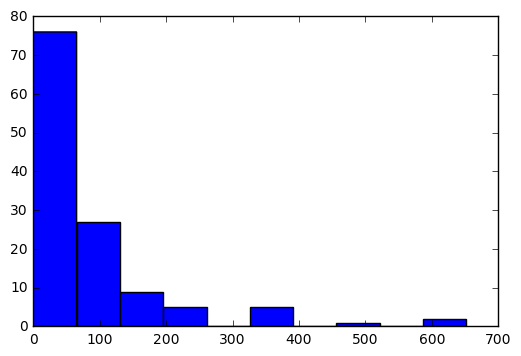

In [58]:
# distribution of post counts among users
plt.hist(np.sum(user_post_counts, axis = 0));

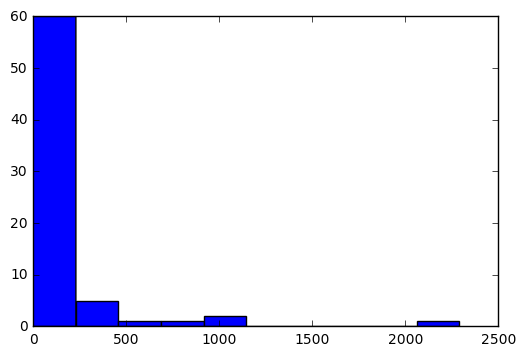

In [66]:
# distribution of channel activity 
plt.hist(np.sum(user_post_counts, axis = 1));

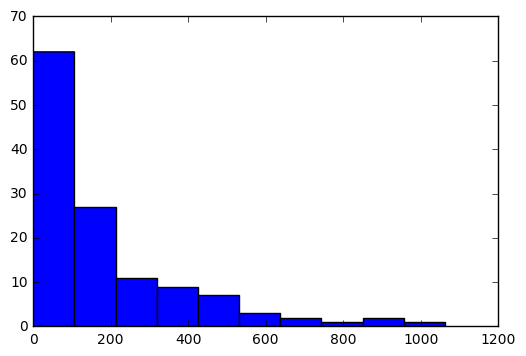

In [61]:
# distribution of total activity among users
plt.hist(np.sum(total_activity, axis = 0));